<a href="https://colab.research.google.com/github/eloisecobourne/DSS-Project-Labs-Sustainability/blob/main/DS_ProjectLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **How does a country's development affect their environmental impact?**




## Aims
- Understanding the relationship between a country’s development and its CO2 emissions.
- Determining whether a country's emissions change in reaction to another country's emissions.
-  Compare a country's environmental impact to the impact they should be making based on their levels of our features. Rate them from -5 to 5 based on where they are vs where they should be.
- Determining if the factors are interlinked, for example if GDP increases, will this cause literacy rate to increase?
- Time predictions using our understanding of their relationship.
- Visualisation: A map through time showing carbon emissions with features on each country.

#Exploratory Data Analysis

Install packages for loading the indicators

In [2]:
!pip install wbgapi
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.8 MB/s eta 0:00:00


In [4]:
import wbgapi as wb
import pandas as pd
import pycountry

In [5]:
available_indicators = wb.series.info()
#print(available_indicators)

Searching for relevant indicators

In [6]:
# CO2 Indicators
print(wb.series.info(q="CO2")) # Chose 1

"""
print(wb.series.info(q='GDP per capita')) # Chose 1
print(wb.series.info(q='life expectancy')) # Chose 1
print(wb.series.info(q='mortality'))
print(wb.series.info(q='education'))
print(wb.series.info(q='energy'))
print(wb.series.info(q='renewable'))
print(wb.series.info(q="area"))
print(wb.series.info(q="HDI"))
"""

id                          value
--------------------------  ------------------------------------------------------------------------------------------
EN.GHG.CO2.AG.MT.CE.AR5     Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)
EN.GHG.CO2.BU.MT.CE.AR5     Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)
EN.GHG.CO2.FE.MT.CE.AR5     Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)
EN.GHG.CO2.IC.MT.CE.AR5     Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)
EN.GHG.CO2.IP.MT.CE.AR5     Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)
EN.GHG.CO2.LU.DF.MT.CE.AR5  Carbon dioxide (CO2) net fluxes from LULUCF - Deforestation (Mt CO2e)
EN.GHG.CO2.LU.FL.MT.CE.AR5  Carbon dioxide (CO2) net fluxes from LULUCF - Forest Land (Mt CO2e)
EN.GHG.CO2.LU.MT.CE.AR5     Carbon dioxide (CO2) net fluxes from LULUCF - Total excluding non-tropical fires (Mt CO2e)
EN.GHG.CO2.LU.OL.MT.CE.AR5  Carbon dioxide (CO2) net f

'\nprint(wb.series.info(q=\'GDP per capita\')) # Chose 1\nprint(wb.series.info(q=\'life expectancy\')) # Chose 1\nprint(wb.series.info(q=\'mortality\'))\nprint(wb.series.info(q=\'education\'))\nprint(wb.series.info(q=\'energy\'))\nprint(wb.series.info(q=\'renewable\'))\nprint(wb.series.info(q="area"))\nprint(wb.series.info(q="HDI"))\n'

# Indicators chosen:
Sourced from World Bank Group

NY.GDP.PCAP.KD - GDP per capita (constant 2015 US$) Adjusted for inflation
  
EN.GHG.CO2.PC.CE.AR5 - Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)

SP.DYN.LE00.IN - Life expectancy at birth, total (years)

SP.DYN.IMRT.IN - Mortality rate, infant (per 1,000 live births)


HDI - Exernaly sourced from UNDP (https://hdr.undp.org/data-center/documentation-and-downloads) to download all the data from 1990 - 2023
(*All composite indices and components time series (1990-2023)*)


AG.LND.TOTL.K2 - Land area (sq. km) (excludes water sources from the country)


ISO3 codes are pulled from pycountry library

In [7]:
# Add indicators as dictionary
# "Indicator CODE" : "Basic Description"
indicators = {
    "NY.GDP.PCAP.KD" : "gdp_pc",
    "EN.GHG.CO2.PC.CE.AR5": "CO2_total_ex_LULUCF",
    "SP.DYN.LE00.IN": "life_expectancy",
    "SP.DYN.IMRT.IN" : "infant_mortality"
}
# Time range
years = range(1990, 2024)

In [8]:
# Be mindful to run this, it took me like 3 minutes with 4 indicators from 1990-2023 :(
df = wb.data.DataFrame(
    indicators.keys(), # Indicators to include
    time = years, # Time range
    labels = True,
    columns = "series"
).reset_index()

In [9]:
display(df.head())
print(df.shape)

,economy,time,Country,Time,EN.GHG.CO2.PC.CE.AR5,NY.GDP.PCAP.KD,SP.DYN.IMRT.IN,SP.DYN.LE00.IN
0,ZWE,YR2023,Zimbabwe,2023,0.768994,1418.471846,40.6,62.775
1,ZWE,YR2022,Zimbabwe,2022,0.719221,1369.197615,42.2,62.360
2,ZWE,YR2021,Zimbabwe,2021,0.688925,1312.200014,43.6,60.135
3,ZWE,YR2020,Zimbabwe,2020,0.584444,1230.819334,44.9,61.530
4,ZWE,YR2019,Zimbabwe,2019,0.731473,1357.530878,46.0,61.060


(9044, 8)


In [10]:
# Drop the time column as redundant
df = df.drop('time', axis=1)
display(df.head())

,economy,Country,Time,EN.GHG.CO2.PC.CE.AR5,NY.GDP.PCAP.KD,SP.DYN.IMRT.IN,SP.DYN.LE00.IN
0,ZWE,Zimbabwe,2023,0.768994,1418.471846,40.6,62.775
1,ZWE,Zimbabwe,2022,0.719221,1369.197615,42.2,62.360
2,ZWE,Zimbabwe,2021,0.688925,1312.200014,43.6,60.135
3,ZWE,Zimbabwe,2020,0.584444,1230.819334,44.9,61.530
4,ZWE,Zimbabwe,2019,0.731473,1357.530878,46.0,61.060


We consider the economy field as the iso3 code and perform an inner join with the HDI table which contains all 195 countries and their iso3 codes




In [11]:
df = df.rename(columns=indicators)
df = df.rename(columns = {"Country": "country", "Time": "year", "economy": "iso3"})

df.head(5)

,iso3,country,year,CO2_total_ex_LULUCF,gdp_pc,infant_mortality,life_expectancy
0,ZWE,Zimbabwe,2023,0.768994,1418.471846,40.6,62.775
1,ZWE,Zimbabwe,2022,0.719221,1369.197615,42.2,62.360
2,ZWE,Zimbabwe,2021,0.688925,1312.200014,43.6,60.135
3,ZWE,Zimbabwe,2020,0.584444,1230.819334,44.9,61.530
4,ZWE,Zimbabwe,2019,0.731473,1357.530878,46.0,61.060


In [12]:
df["year"] = df["year"].astype(int)
print(df.shape)

(9044, 7)


In [13]:
df_countries = df.copy()

Pulling the HDI table

In [14]:
FILE_PATH = "https://raw.githubusercontent.com/daniel-matveev/DS_ProjectLab/master/HDI_Data.csv"

wide_hdi_data = pd.read_csv(
    FILE_PATH,
    encoding = "latin1"
)

print(wide_hdi_data.shape)
wide_hdi_data.head()


(195, 39)


,iso3,country,hdicode,region,hdi_rank_2023,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021,hdi_2022,hdi_2023
0,AFG,Afghanistan,Low,SA,181.0,0.285,0.291,0.301,0.311,0.305,...,0.497,0.496,0.495,0.496,0.498,0.507,0.501,0.486,0.495,0.496
1,ALB,Albania,Very High,ECA,71.0,0.654,0.638,0.622,0.624,0.629,...,0.797,0.797,0.797,0.798,0.801,0.805,0.794,0.794,0.806,0.810
2,DZA,Algeria,High,AS,96.0,0.595,0.596,0.601,0.603,0.603,...,0.732,0.737,0.743,0.746,0.749,0.753,0.742,0.755,0.761,0.763
3,AND,Andorra,Very High,NaN,32.0,NaN,NaN,NaN,NaN,NaN,...,0.866,0.869,0.872,0.873,0.875,0.876,0.851,0.871,0.893,0.913
4,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,0.577,0.603,0.609,0.610,0.611,0.611,0.610,0.609,0.615,0.616


In [15]:
hdi_columns = [col for col in wide_hdi_data.columns if col.startswith('hdi_') and col[4:].isdigit()]

In [16]:
# Convert the HDI table to a long format which matches the format of the indicator table
long_hdi_data = wide_hdi_data.melt(
    id_vars = ["iso3", "country"],
    value_vars = hdi_columns,
    var_name = "Year",
    value_name = "hdi"
)
# Rename column to be able to merge the two tables together
long_hdi_data = long_hdi_data.rename(columns = {"Year" : "year"})

long_hdi_data
# 6630 rows / 34 years = 195 countries

,iso3,country,year,hdi
0,AFG,Afghanistan,hdi_1990,0.285
1,ALB,Albania,hdi_1990,0.654
2,DZA,Algeria,hdi_1990,0.595
3,AND,Andorra,hdi_1990,NaN
4,AGO,Angola,hdi_1990,NaN
...,...,...,...,...
6625,VEN,Venezuela (Bolivarian Republic of),hdi_2023,0.709
6626,VNM,Vietnam,hdi_2023,0.766
6627,YEM,Yemen,hdi_2023,0.470
6628,ZMB,Zambia,hdi_2023,0.595


In [17]:
# Clean the year
long_hdi_data['year'] = long_hdi_data['year'].str.extract(r'(\d{4})').astype(int)

In [18]:
long_hdi_data.head()

,iso3,country,year,hdi
0,AFG,Afghanistan,1990,0.285
1,ALB,Albania,1990,0.654
2,DZA,Algeria,1990,0.595
3,AND,Andorra,1990,NaN
4,AGO,Angola,1990,NaN


In [19]:
df_merged = df_countries.merge(
    long_hdi_data[["iso3", "year", "hdi", "country"]],
    on = ["iso3", "year"],
    how = "inner"
)

df_merged = df_merged.drop(columns="country_x")
df_merged = df_merged.rename(columns= {"country_y": "country"})

In [20]:
df_merged.shape
# 6630 rows / 34 years = 195 countries

(6630, 8)

In [21]:
df_merged["country"].unique()

array(['Zimbabwe', 'Zambia', 'Yemen', 'Palestine, State of', 'Vietnam',
       'Venezuela (Bolivarian Republic of)', 'Vanuatu', 'Uzbekistan',
       'Uruguay', 'United States', 'United Kingdom',
       'United Arab Emirates', 'Ukraine', 'Uganda', 'Tuvalu',
       'Turkmenistan', 'Turkiye', 'Tunisia', 'Trinidad and Tobago',
       'Tonga', 'Togo', 'Timor-Leste', 'Thailand',
       'Tanzania (United Republic of)', 'Tajikistan',
       'Syrian Arab Republic', 'Switzerland', 'Sweden', 'Suriname',
       'Sudan', 'Saint Vincent and the Grenadines', 'Saint Lucia',
       'Saint Kitts and Nevis', 'Sri Lanka', 'Spain', 'South Sudan',
       'South Africa', 'Somalia', 'Solomon Islands', 'Slovenia',
       'Slovakia', 'Singapore', 'Sierra Leone', 'Seychelles', 'Serbia',
       'Senegal', 'Saudi Arabia', 'Sao Tome and Principe', 'San Marino',
       'Samoa', 'Rwanda', 'Russian Federation', 'Romania', 'Qatar',
       'Portugal', 'Poland', 'Philippines', 'Peru', 'Paraguay',
       'Papua New Guinea

In [22]:
year_to_plot = 2023

df_year = df_merged[
    (df_merged["year"] == year_to_plot) &
    (df_merged['hdi'].notna()) &
    (df_merged['CO2_total_ex_LULUCF'].notna())
    ]

df_year.head()

,iso3,year,CO2_total_ex_LULUCF,gdp_pc,infant_mortality,life_expectancy,hdi,country
0,ZWE,2023,0.768994,1418.471846,40.6,62.775,0.598,Zimbabwe
34,ZMB,2023,0.548090,1330.859982,30.9,66.349,0.595,Zambia
68,YEM,2023,0.269743,NaN,34.7,69.295,0.470,Yemen
136,VNM,2023,3.893540,3775.463756,14.0,74.588,0.766,Vietnam
170,VEN,2023,3.405915,1430.745752,21.5,72.514,0.709,Venezuela (Bolivarian Republic of)


# **Summary Statistics**

### **Missing Data**

Certain indicators have consistently missing data throughout all years.

In [23]:
# Summary statistics for NAs count per year per indicator
indicator_columns = df_merged.select_dtypes(include = "number").columns.tolist()

# Remove the year column from the indicator list
indicator_columns = indicator_columns[1:]

na_by_year = (
    df_merged
    .groupby("year")[indicator_columns]
    .apply(lambda x: x.isna().sum())
)
print("\n --- Number of countries per year with missing data ---")
display(na_by_year)
# For some indicators the number of countries for which this indicator is missing is constant
# CO2_total_ex_LULUCF has a constant of 9
# infant_mortality has 14


 --- Number of countries per year with missing data ---


,CO2_total_ex_LULUCF,gdp_pc,infant_mortality,life_expectancy,hdi
year,,,,,
1990,8,10,2,0,54
1991,8,10,2,0,54
1992,8,9,2,0,54
1993,8,9,2,0,53
1994,8,8,2,0,53
1995,8,7,2,0,46
1996,8,7,2,0,46
1997,8,5,2,0,46
1998,8,5,2,0,46


In [24]:
# Summary statistics for NAs count per year per indicator
na_by_country = (
    df_merged
    .groupby("country") [
        ["CO2_total_ex_LULUCF", "hdi", "gdp_pc", "infant_mortality"]
    ]
    .apply(lambda x: x.isnull().sum())
)
print("\n --- Countries and the number of missing data they have ---")
display(na_by_country[na_by_country.sum(axis=1) > 30])


 --- Countries and the number of missing data they have ---


,CO2_total_ex_LULUCF,hdi,gdp_pc,infant_mortality
country,,,,
Andorra,34,10,0,0
"Hong Kong, China (SAR)",0,0,0,34
Korea (Democratic People's Rep. of),0,34,34,0
Liechtenstein,34,10,33,34
Monaco,34,34,0,0
Montenegro,34,13,7,0
"Palestine, State of",34,14,4,0
San Marino,34,10,7,0
Serbia,34,5,5,0


In [25]:
#summary statistics for df_year
print("\n--- Numerical Summary Statistics ---")
display(df_merged.drop(columns='year').describe())

print("\n--- Unique Countries ---")
print(df_merged['country'].unique())

#looking at 2023 specifically
print("\n\033[1mlooking at 2023\033[0m")
print("\n--- Top countries by HDI in 2023 ---")
display(df_year[['country','hdi']].sort_values(by='hdi', ascending=False).head())

print("\n--- Bottom countries by HDI in 2023 ---")
display(df_year[['country','hdi']].sort_values(by='hdi', ascending=True).head())

print("\n--- Countries that contribute most to CO2 emissions in 2023 ---")
display(df_year[['country','CO2_total_ex_LULUCF']].sort_values(by='CO2_total_ex_LULUCF', ascending=False).head())

print("\n--- Countries that contribute least to CO2 emissions in 2023---")
display(df_year[['country','CO2_total_ex_LULUCF']].sort_values(by='CO2_total_ex_LULUCF', ascending=True).head())

#looking at means
df_country_mean = df_merged.drop(columns=['year', 'iso3']).groupby('country', as_index=False).mean()
print("\n\033[1mLooking at the mean values\033[0m")
print("\n--- Top countries by HDI ---")
display(df_country_mean[['country','hdi']].sort_values(by='hdi', ascending=False).head())

print("\n--- Bottom countries by HDI ---")
display(df_country_mean[['country','hdi']].sort_values(by='hdi', ascending=True).head())

print("\n--- Countries that contribute most to CO2 emissions ---")
display(df_country_mean[['country','CO2_total_ex_LULUCF']].sort_values(by='CO2_total_ex_LULUCF', ascending=False).head())

print("\n--- Countries that contribute least to CO2 emissions ---")
display(df_country_mean[['country','CO2_total_ex_LULUCF']].sort_values(by='CO2_total_ex_LULUCF', ascending=True).head())





--- Numerical Summary Statistics ---


,CO2_total_ex_LULUCF,gdp_pc,infant_mortality,life_expectancy,hdi
count,6358.000000,6461.000000,6562.000000,6630.000000,5940.000000
mean,4.974422,12411.279603,32.269445,68.717569,0.683066
std,9.875278,19474.974490,31.149694,9.568064,0.164983
min,0.000000,166.710440,1.400000,12.158000,0.215000
25%,0.524995,1452.186583,8.500000,62.941250,0.564000
50%,2.063040,4279.615471,20.300000,70.580976,0.706000
75%,6.369809,14050.313558,47.200000,75.711896,0.809250
max,202.865184,225884.183304,274.000000,86.372000,0.972000



--- Unique Countries ---
['Zimbabwe' 'Zambia' 'Yemen' 'Palestine, State of' 'Vietnam'
 'Venezuela (Bolivarian Republic of)' 'Vanuatu' 'Uzbekistan' 'Uruguay'
 'United States' 'United Kingdom' 'United Arab Emirates' 'Ukraine'
 'Uganda' 'Tuvalu' 'Turkmenistan' 'Turkiye' 'Tunisia'
 'Trinidad and Tobago' 'Tonga' 'Togo' 'Timor-Leste' 'Thailand'
 'Tanzania (United Republic of)' 'Tajikistan' 'Syrian Arab Republic'
 'Switzerland' 'Sweden' 'Suriname' 'Sudan'
 'Saint Vincent and the Grenadines' 'Saint Lucia' 'Saint Kitts and Nevis'
 'Sri Lanka' 'Spain' 'South Sudan' 'South Africa' 'Somalia'
 'Solomon Islands' 'Slovenia' 'Slovakia' 'Singapore' 'Sierra Leone'
 'Seychelles' 'Serbia' 'Senegal' 'Saudi Arabia' 'Sao Tome and Principe'
 'San Marino' 'Samoa' 'Rwanda' 'Russian Federation' 'Romania' 'Qatar'
 'Portugal' 'Poland' 'Philippines' 'Peru' 'Paraguay' 'Papua New Guinea'
 'Panama' 'Palau' 'Pakistan' 'Oman' 'Norway' 'North Macedonia' 'Nigeria'
 'Niger' 'Nicaragua' 'New Zealand' 'Netherlands' 'Nepal' 

,country,hdi
4012,Iceland,0.972
884,Switzerland,0.970
2176,Norway,0.970
5032,Denmark,0.962
4420,Germany,0.959



--- Bottom countries by HDI in 2023 ---


,country,hdi
1258,Somalia,0.404
5508,Central African Republic,0.414
5474,Chad,0.416
2278,Niger,0.419
2958,Mali,0.419



--- Countries that contribute most to CO2 emissions in 2023 ---


,country,CO2_total_ex_LULUCF
2074,Palau,78.857111
1802,Qatar,48.642637
6188,Bahrain,24.532373
3468,Kuwait,22.697211
5780,Brunei Darussalam,21.143090



--- Countries that contribute least to CO2 emissions in 2023---


,country,CO2_total_ex_LULUCF
476,Tuvalu,0.000000
2448,Nauru,0.000000
2754,Micronesia (Federated States of),0.001776
2890,Marshall Islands,0.002576
1258,Somalia,0.046278



Looking at the mean values

--- Top countries by HDI ---


,country,hdi
130,Norway,0.930912
76,Iceland,0.922324
169,Switzerland,0.919324
64,Germany,0.916088
100,Liechtenstein,0.915958



--- Bottom countries by HDI ---


,country,hdi
127,Niger,0.314412
32,Central African Republic,0.346625
107,Mali,0.357912
27,Burundi,0.368294
163,South Sudan,0.372286



--- Countries that contribute most to CO2 emissions ---


,country,CO2_total_ex_LULUCF
133,Palau,103.734793
142,Qatar,46.759137
92,Kuwait,26.120400
184,United Arab Emirates,25.710030
12,Bahrain,25.507822



--- Countries that contribute least to CO2 emissions ---


,country,CO2_total_ex_LULUCF
122,Nauru,0.000000
181,Tuvalu,0.000000
113,Micronesia (Federated States of),0.001798
109,Marshall Islands,0.002079
27,Burundi,0.043958


In [26]:
df_merged[df_merged['iso3'] == "PRK"].head()

,iso3,year,CO2_total_ex_LULUCF,gdp_pc,infant_mortality,life_expectancy,hdi,country
3536,PRK,2023,2.485362,NaN,14.5,73.642,NaN,Korea (Democratic People's Rep. of)
3537,PRK,2022,2.271410,NaN,14.3,73.641,NaN,Korea (Democratic People's Rep. of)
3538,PRK,2021,2.183952,NaN,14.1,73.437,NaN,Korea (Democratic People's Rep. of)
3539,PRK,2020,2.641727,NaN,14.1,72.783,NaN,Korea (Democratic People's Rep. of)
3540,PRK,2019,2.819423,NaN,14.3,72.928,NaN,Korea (Democratic People's Rep. of)


###**Visualisation**

In [27]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

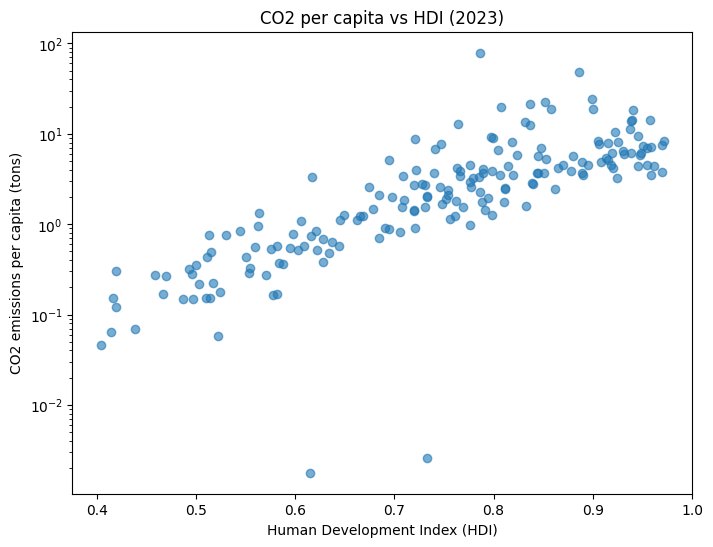

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df_year['hdi'], df_year['CO2_total_ex_LULUCF'], alpha=0.6)
plt.yscale("log")
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('CO2 emissions per capita (tons)')
plt.title(f'CO2 per capita vs HDI ({year_to_plot})')
plt.show()

# There are 2 visible outliers, one opears below on the log scale
# One appears on the normal scale above everything else

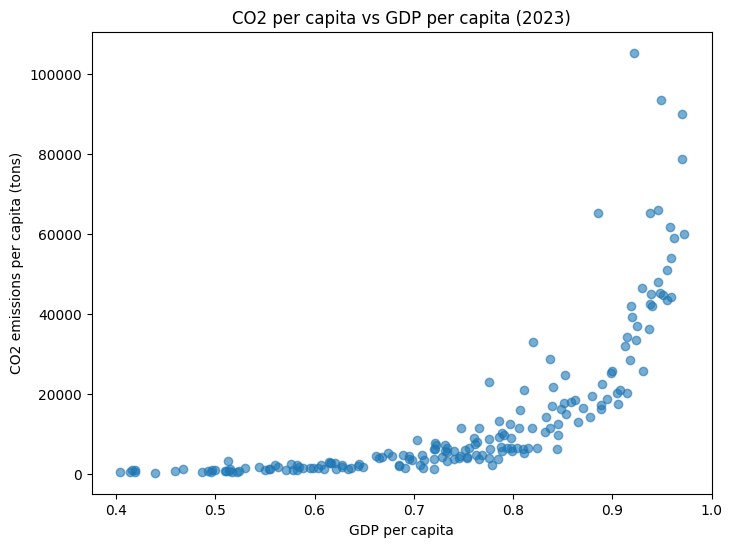

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(df_year['hdi'], df_year['gdp_pc'], alpha=0.6)
plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions per capita (tons)')

plt.title(f'CO2 per capita vs GDP per capita ({year_to_plot})')
plt.show()

(5784, 8)


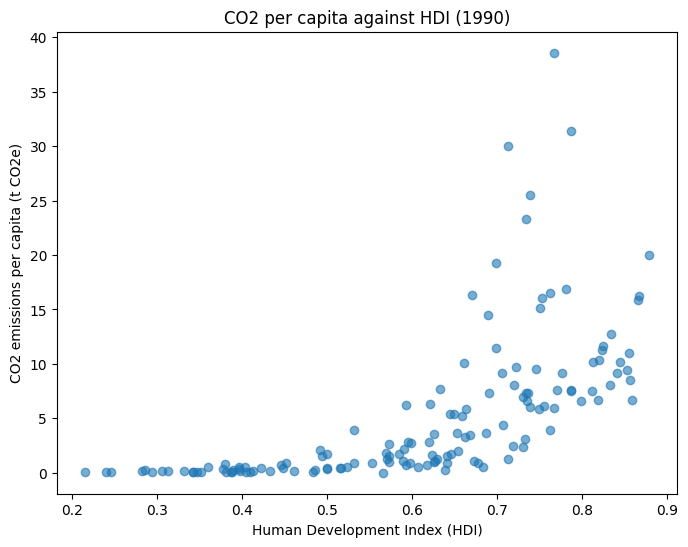

In [30]:
df_animation = df_merged[
    (df_merged["hdi"].notna()) &
    (df_merged["CO2_total_ex_LULUCF"].notna())
].copy()
print(df_animation.shape)
df_animation["year"] = df_animation["year"].astype(int)
df_animation = df_animation.sort_values(["iso3", "year"])

# Graph axis limits
xmin = 0.3
xmax = 1
ymin = df_animation["CO2_total_ex_LULUCF"].min()
ymax = df_animation["CO2_total_ex_LULUCF"].max()

fig, ax = plt.subplots(figsize = (8, 6))


scatter = ax.scatter([], [], alpha=0.6)

ax.set_xlim(xmin, xmax)
ax.set_ylim(0, ymax * 1.1)


frames = sorted(df_animation["year"].unique())

def update(year):
  ax.clear()

  data = df_animation[df_animation["year"] == year]

  ax.scatter(
      data["hdi"],
      data["CO2_total_ex_LULUCF"],
      alpha = 0.6
  )

  ax.set_xlabel("Human Development Index (HDI)")
  ax.set_ylabel("CO2 emissions per capita (t CO2e)")
  ax.set_title(f"CO2 per capita against HDI ({year})")

  # Set to a log scale
  #ax.set_yscale("log")


animation = FuncAnimation(
    fig,
    update,
    frames = years,
    interval = 300
)

animation.save(
    "co2_hdi_animation.mp4",
    writer = "ffmpeg",
    fps = 3
)


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '900x600', '-pix_fmt', 'rgba', '-framerate', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'co2_hdi_animation_smooth_log.mp4']' returned non-zero exit status 255.

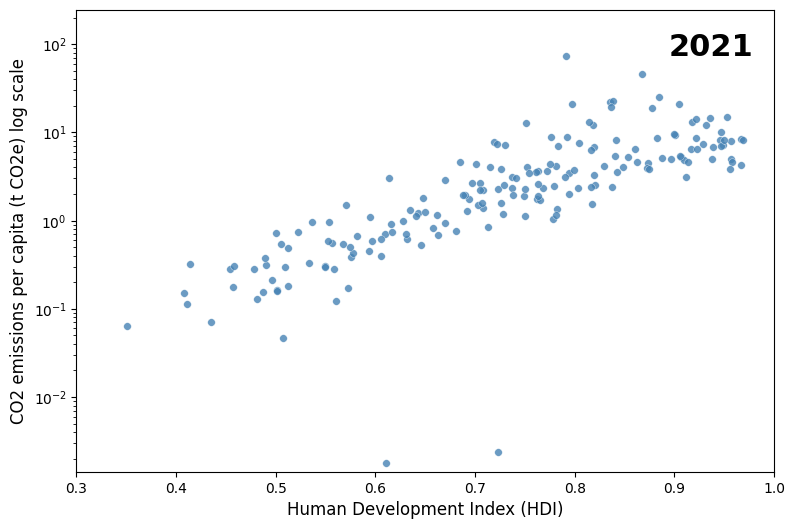

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

df_animation = df_merged[
    (df_merged["hdi"].notna()) &
    (df_merged["CO2_total_ex_LULUCF"].notna())
].copy()

df_animation["year"] = df_animation["year"].astype(int)
df_animation = df_animation.sort_values(["iso3", "year"])
df_animation = df_animation[df_animation["CO2_total_ex_LULUCF"] > 0].copy()

# Fixed axis limits (set once, never change)
xmin, xmax = 0.3, 1.0
ymin, ymax = 0, df_animation["CO2_total_ex_LULUCF"].max() * 1.1
ymin_log = df_animation["CO2_total_ex_LULUCF"][df_animation["CO2_total_ex_LULUCF"] > 0].min() * 0.8

years = sorted(df_animation["year"].unique())
STEPS_PER_YEAR = 20  # interpolation frames between each year

def get_interpolated_frame(year_from, year_to, t):
    """t goes from 0 to 1 between year_from and year_to"""
    d0 = df_animation[df_animation["year"] == year_from].set_index("iso3")
    d1 = df_animation[df_animation["year"] == year_to].set_index("iso3")
    common = d0.index.intersection(d1.index)

    hdi_interp  = d0.loc[common, "hdi"] * (1 - t) + d1.loc[common, "hdi"] * t
    co2_interp  = d0.loc[common, "CO2_total_ex_LULUCF"] * (1 - t) + d1.loc[common, "CO2_total_ex_LULUCF"] * t
    return hdi_interp.values, co2_interp.values

# Build all frames as (hdi_array, co2_array, label) tuples
all_frames = []
for i, year in enumerate(years):
    if i < len(years) - 1:
        next_year = years[i + 1]
        for step in range(STEPS_PER_YEAR):
            t = step / STEPS_PER_YEAR
            hdi_vals, co2_vals = get_interpolated_frame(year, next_year, t)
            # Show year label blending
            label = f"{year}" if t < 0.5 else f"{next_year}"
            all_frames.append((hdi_vals, co2_vals, label))
    else:
        # Last year — hold for a bit
        d = df_animation[df_animation["year"] == year]
        for _ in range(STEPS_PER_YEAR):
            all_frames.append((d["hdi"].values, d["CO2_total_ex_LULUCF"].values, str(year)))

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xlim(xmin, xmax)

ax.set_yscale("log")

ax.set_ylim(ymin_log, ymax * 1.1)

ax.set_xlabel("Human Development Index (HDI)", fontsize=12)
ax.set_ylabel("CO2 emissions per capita (t CO2e) log scale", fontsize=12)
scat = ax.scatter([], [], alpha=0.8, s=30, c="steelblue", edgecolors="white", linewidths=0.3)
year_text = ax.text(0.97, 0.95, "", transform=ax.transAxes,
                    fontsize=22, ha="right", va="top",
                    fontweight="bold", color="black")

def update(frame_idx):
    hdi_vals, co2_vals, label = all_frames[frame_idx]
    scat.set_offsets(np.column_stack([hdi_vals, co2_vals]))
    year_text.set_text(label)
    return scat, year_text

anim = FuncAnimation(fig, update, frames=len(all_frames), interval=50, blit=True)

anim.save(
    "co2_hdi_animation_smooth_log.mp4",
    writer="ffmpeg",
    fps=30  # smooth 30fps output
)
plt.close()

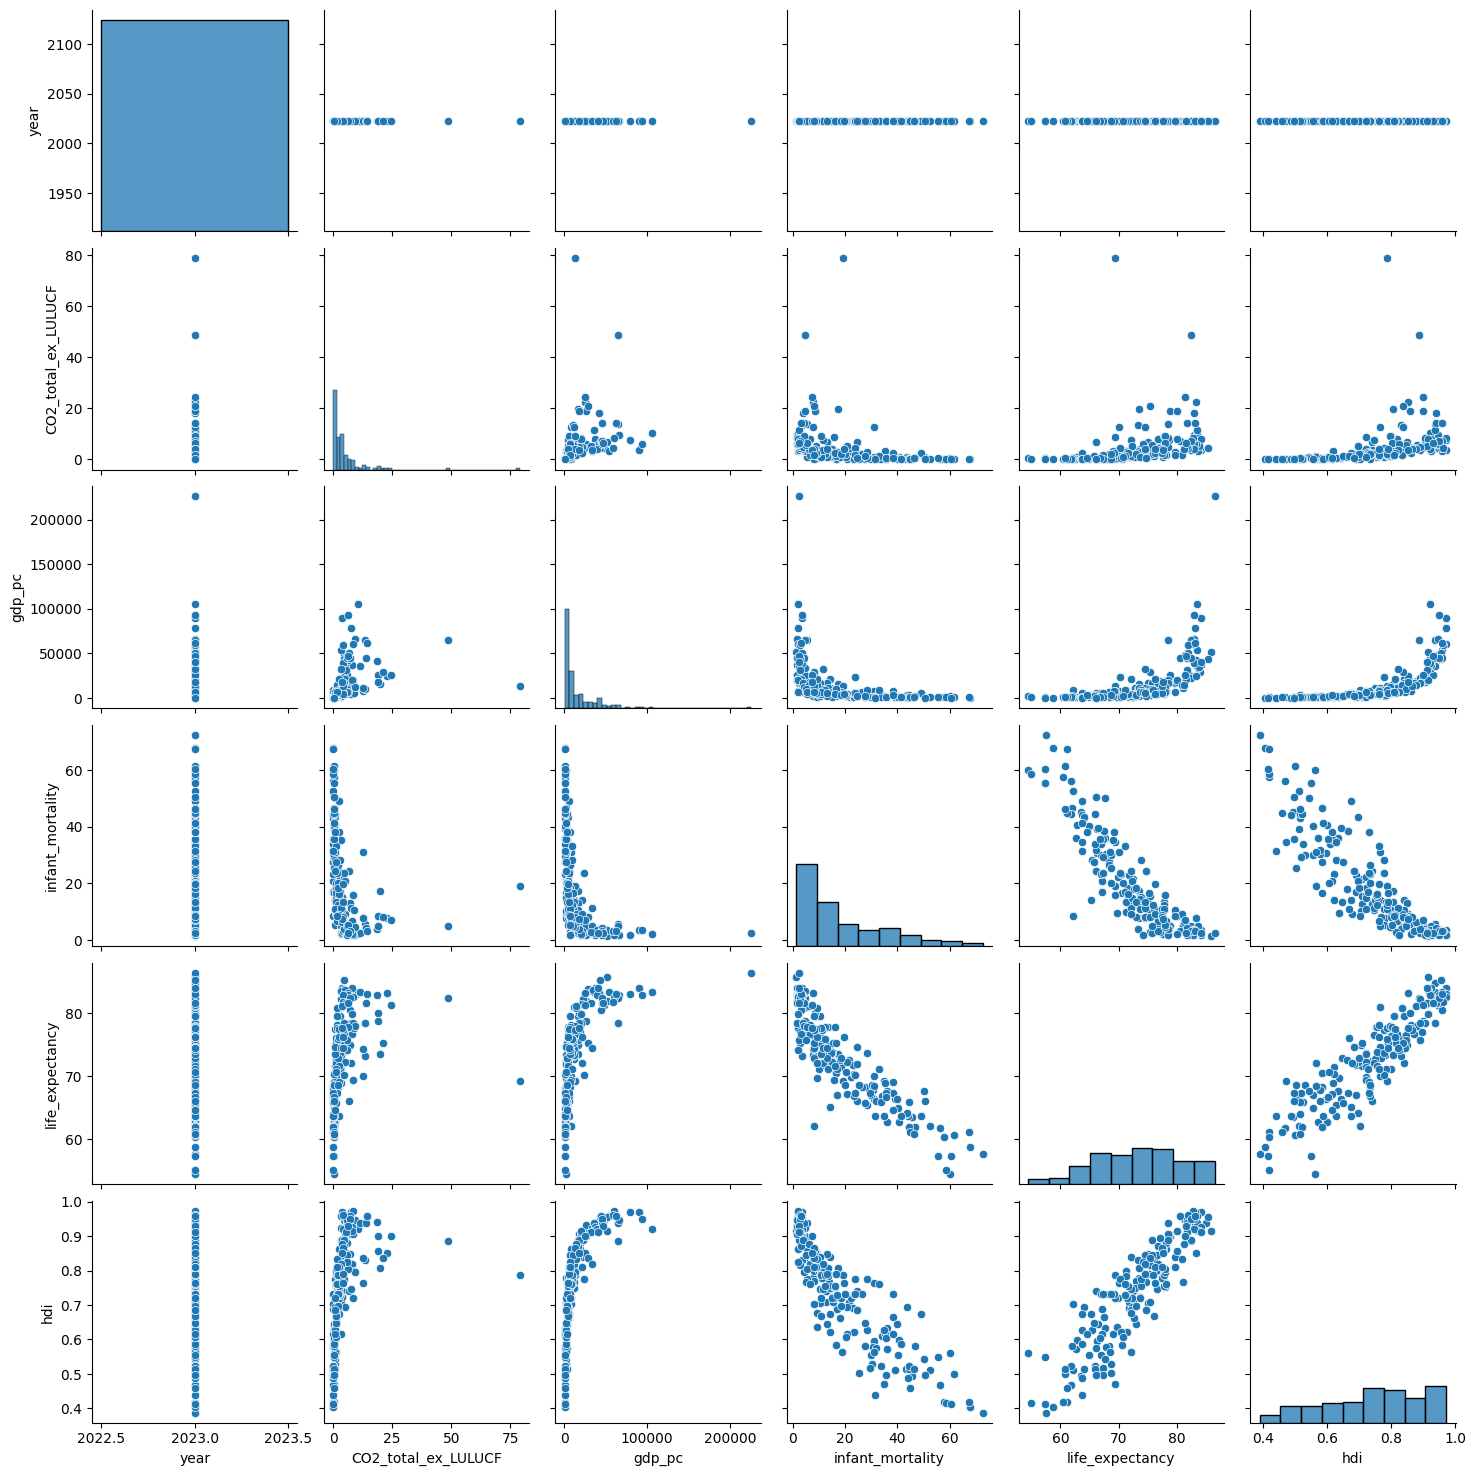

In [32]:
import seaborn as sns

sns.pairplot(df_merged[df_merged["year"] == 2023])

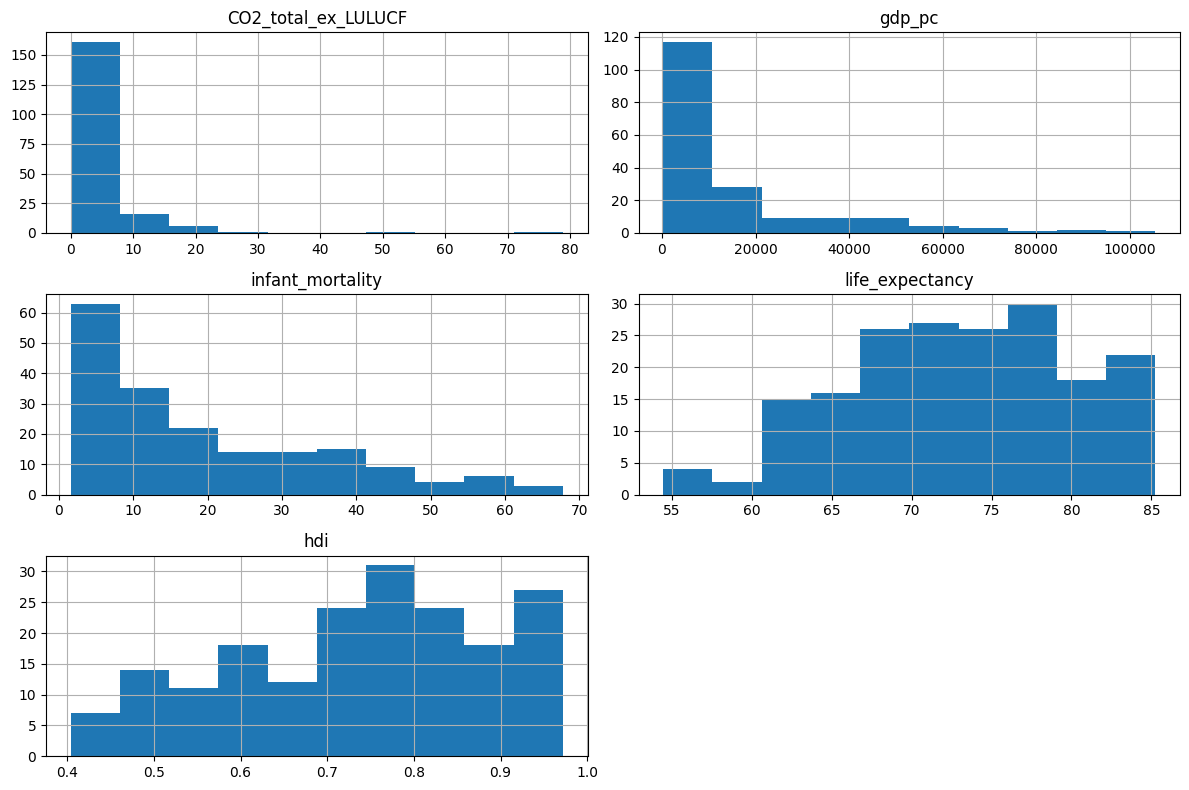

In [33]:
df_year.drop(columns="year").hist(figsize = (12,8))
plt.tight_layout()

# Analysing Outliers

Looking at Palau as it has the highest CO2 emissions per capita since early 2000s

And the countries which have racorded the lowest CO2 emissions per capita, Micronesia (Federated States of)	and Marshall Islands.

Some countries which have reported 0 tonnes CO2 emissions per capita Nauru and Tuvalu

# Correlation Analysis

In [34]:
import scipy.stats as stats

In [35]:
decades = {
    "1990s" : range(1990, 2000),
    "2000s" : range(2000, 2010),
    "2010s" : range(2010, 2020),
    "2020s" : range(2020, 2024),
}

for decade_name, decade_years in decades.items():
  decade_subset = df_merged[df_merged["year"].isin(decade_years)][["country", "hdi", "CO2_total_ex_LULUCF"]].dropna()
  rho, p_value = stats.spearmanr(decade_subset["hdi"], decade_subset["CO2_total_ex_LULUCF"])
  print(f"{decade_name}: Spearman's r = {rho:.4f}, p = {p_value:.4f}, Number of Countries: {len(decade_subset["country"].unique())}, Sample Size: {len(decade_subset)}")


1990s: Spearman's r = 0.8756, p = 0.0000, Number of Countries: 152, Sample Size: 1451
2000s: Spearman's r = 0.8617, p = 0.0000, Number of Countries: 182, Sample Size: 1743
2010s: Spearman's r = 0.8658, p = 0.0000, Number of Countries: 185, Sample Size: 1849
2020s: Spearman's r = 0.8566, p = 0.0000, Number of Countries: 186, Sample Size: 741


Main results:

Within the each decade a value of 0.85-0.87 shows a strong positive monotonic relationship between the HDI of a country and its total CO2 per capita emissions.

To note:

As time progresses more countries are being tracked, so at the start more developed nations will contain data. Then during the 2000s more lower HDI countries begin to be tracked, these countries bring variability perchance due to inconsistent reporting techniques, resulting in the correlation coefficient slightly decreasing.

To combat this below we looked at countries that have data accross all decades


In [36]:
for year in range(1990, 2024):
  decade_subset = df_merged[df_merged["year"] == year][["hdi", "CO2_total_ex_LULUCF"]].dropna()
  rho, p_value = stats.spearmanr(decade_subset["hdi"], decade_subset["CO2_total_ex_LULUCF"])
  print(f"{year}: Spearman's r = {rho:.4f}, p = {p_value:.4f}, Number of Countries: {len(decade_subset)}")

1990: Spearman's r = 0.8792, p = 0.0000, Number of Countries: 141
1991: Spearman's r = 0.8778, p = 0.0000, Number of Countries: 141
1992: Spearman's r = 0.8758, p = 0.0000, Number of Countries: 141
1993: Spearman's r = 0.8740, p = 0.0000, Number of Countries: 142
1994: Spearman's r = 0.8775, p = 0.0000, Number of Countries: 142
1995: Spearman's r = 0.8727, p = 0.0000, Number of Countries: 148
1996: Spearman's r = 0.8787, p = 0.0000, Number of Countries: 148
1997: Spearman's r = 0.8795, p = 0.0000, Number of Countries: 148
1998: Spearman's r = 0.8812, p = 0.0000, Number of Countries: 148
1999: Spearman's r = 0.8848, p = 0.0000, Number of Countries: 152
2000: Spearman's r = 0.8657, p = 0.0000, Number of Countries: 167
2001: Spearman's r = 0.8640, p = 0.0000, Number of Countries: 167
2002: Spearman's r = 0.8603, p = 0.0000, Number of Countries: 168
2003: Spearman's r = 0.8630, p = 0.0000, Number of Countries: 168
2004: Spearman's r = 0.8634, p = 0.0000, Number of Countries: 169
2005: Spea

In [37]:
def subset_countries_with_data(decade_range):
  """
    Function to return all iso3 codes for the countries that have data for the specified period of time (decade_range)
  """
  subset_decade = df_merged[df_merged["year"].isin(decade_range)]
  valid = subset_decade.dropna(subset = ["CO2_total_ex_LULUCF", "hdi"])
  return set(valid["iso3"].unique())

In [38]:
og_countries = df_merged[df_merged["year"] == 1990][["iso3", "hdi", "CO2_total_ex_LULUCF"]].dropna()
print(f"Number of countries that have been tracking HDI since 1990: {len(og_countries["iso3"])}")

Number of countries that have been tracking HDI since 1990: 141


In [39]:
country_sets = {decade: subset_countries_with_data(range) for decade, range in decades.items()}
#country_sets["og"] = og_countries["iso3"] # To have only countries that have been tracking hdi since 1990

In [40]:
# Intersection so we select only the iso3 codes present in all sets
countries_with_data = set.intersection(*country_sets.values())
print(f"Number of countries that have data accross all decades: {len(countries_with_data)}")

Number of countries that have data accross all decades: 152


In [41]:
for decade_name, decade_years in decades.items():
  decade_subset = df_merged[
      df_merged["year"].isin(decade_years) &
      df_merged["iso3"].isin(countries_with_data)
  ][["country", "hdi", "CO2_total_ex_LULUCF"]].dropna()

  rho, p_value = stats.spearmanr(decade_subset["hdi"], decade_subset["CO2_total_ex_LULUCF"])
  print(f"{decade_name}: Spearman's r = {rho:.4f}, p = {p_value:.4f}, Number of Countries: {len(decade_subset["country"].unique())}, Sample Size: {len(decade_subset)}")


1990s: Spearman's r = 0.8756, p = 0.0000, Number of Countries: 152, Sample Size: 1451
2000s: Spearman's r = 0.8837, p = 0.0000, Number of Countries: 152, Sample Size: 1519
2010s: Spearman's r = 0.8818, p = 0.0000, Number of Countries: 152, Sample Size: 1520
2020s: Spearman's r = 0.8637, p = 0.0000, Number of Countries: 152, Sample Size: 607


Now controlling so that we only look at countries that have data for all decades, there is a more stable correlation accross the decades.

Next we need to test if these changes are actually signifcant

In [42]:
from scipy.stats import norm
import numpy as np

def fisher_method_compare_correlations(r1, sample_size1, r2, sample_size2):
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    standard_error = np.sqrt(1/(sample_size1 - 3) + 1/(sample_size2 - 3))
    z_stat = (z1 - z2) / standard_error
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    return z_stat, p_value

### Testing the difference between the correlation coefficients accross decades

(Should I use the number of unique countries or the number of rows as my sample size?)

In [43]:
# 1990s: Spearman's r = 0.8756, p = 0.0000, Number of Countries: 152, Sample Size: 1451
# 1990s: Spearman's r = 0.8756, p = 0.0000, Number of Countries: 152, Sample Size: 1451
z, p = fisher_method_compare_correlations(0.8756, 152, 0.8756, 152)
print(f"z = {z:.3f}, p = {p:.4f}")

z = 0.000, p = 1.0000


In [44]:
# 2000s: Spearman's r = 0.8617, p = 0.0000, Number of Countries: 182, Sample Size: 1743
# 2000s: Spearman's r = 0.8837, p = 0.0000, Number of Countries: 152, Sample Size: 1519
z, p = fisher_method_compare_correlations(0.8617, 182, 0.8837, 152)
print(f"z = {z:.3f}, p = {p:.4f}")

z = -0.834, p = 0.4042


In [45]:
# Original set: 2010s: Spearman's r = 0.8658, p = 0.0000, Number of Countries: 185, Sample Size: 1849
# Held out set: 2010s: Spearman's r = 0.8818, p = 0.0000, Number of Countries: 152, Sample Size: 1520
z, p = fisher_method_compare_correlations(0.8658, 185, 0.8818, 152)
print(f"z = {z:.3f}, p = {p:.4f}")

z = -0.613, p = 0.5397


While the correlation coefficients in the full sample compared are slightly lower than in the held out sample for the 2000s and 2010s. From the above tests these differences are not statistically significant, which means we do not have enough evidence to imply that countries which begin to report their HDI figures later on deviate from the HDI CO2 relationship.